<a href="https://colab.research.google.com/github/Da23849156/PING-HAN-TSAI/blob/master/homeworkAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**資料檢視**

**新增validation set**

In [0]:
x_valid=x_train[:6000]/255

In [0]:
y_valid=y_train[:6000]

In [0]:
x_train_new=x_train[6000:]/255

In [0]:
y_train_new=y_train[6000:]

**建立model**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import Adam

In [0]:
model = Sequential()

**新增Flatten layer，讓輸入的影像成為1D 28X28矩陣**

In [0]:
model.add(Flatten(input_shape=[28,28]))

**改變模型的層數跟神經元數**

In [0]:
model.add(Dense(350,activation="relu"))


In [0]:
model.add(Dense(120,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 350)               274750    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               42120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1210      
Total params: 318,080
Trainable params: 318,080
Non-trainable params: 0
_________________________________________________________________


**改變loss從mse變成sparse_categorical_crossentropy:**
loss不採取mse而使用sparese_categorical_crossentropy。此常用於類別相關辨識。不用categorical_crossentropy主要是因為要辨識的物件不是one-hot encoded。

**改變optimizer從SGD變成adam:**
adam為目前常使用的optimizer之一，能使學習率有個固定範圍，讓參數更新較平穩

**改變learning rate:**

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

**改變batch size跟epochs且增加validation data檢驗**

In [20]:
response=model.fit(x_train_new,y_train_new,batch_size=150,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
360/360 [==============================] - 1s 3ms/step - loss: 0.5148 - accuracy: 0.8177 - val_loss: 0.4210 - val_accuracy: 0.8468
Epoch 2/30
360/360 [==============================] - 1s 3ms/step - loss: 0.3737 - accuracy: 0.8642 - val_loss: 0.3509 - val_accuracy: 0.8722
Epoch 3/30
360/360 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8783 - val_loss: 0.3313 - val_accuracy: 0.8748
Epoch 4/30
360/360 [==============================] - 1s 3ms/step - loss: 0.3036 - accuracy: 0.8881 - val_loss: 0.3116 - val_accuracy: 0.8875
Epoch 5/30
360/360 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.8940 - val_loss: 0.3120 - val_accuracy: 0.8873
Epoch 6/30
360/360 [==============================] - 1s 3ms/step - loss: 0.2708 - accuracy: 0.8987 - val_loss: 0.3115 - val_accuracy: 0.8873
Epoch 7/30
360/360 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.9047 - val_loss: 0.2919 - val_accuracy: 0.8913
Epoch 

In [0]:
import pandas as pd

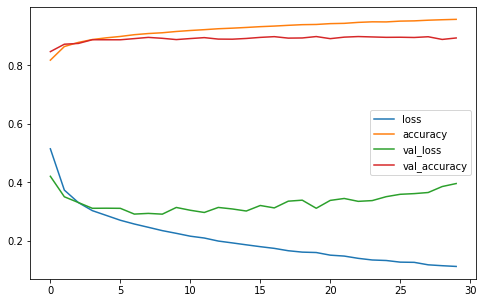

In [22]:
pd.DataFrame(response.history).plot(figsize=(8,5))

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 95.6739 - accuracy: 0.8577


[95.67386627197266, 0.857699990272522]

In [24]:
result=model.predict_classes(x_test)
result

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5])

神經網路預測是： Dress


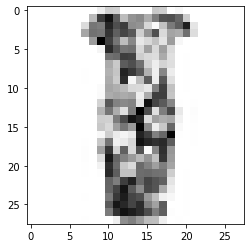

In [25]:
n=100
print('神經網路預測是：',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')